In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import psycopg2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import scipy.stats as stats
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import StratifiedKFold
plt.style.use('seaborn')
np.random.seed(1234)
pd.options.mode.chained_assignment = None
train = pd.read_csv("C:/Users/Pc_User/Desktop/Hackaton Vodafone/train.csv")
test = pd.read_csv("C:/Users/Pc_User/Desktop/Hackaton Vodafone/test.csv")
data_unlabeled = pd.read_parquet("C:/Users/Pc_User/Desktop/Hackaton Vodafone/full_dataset.parquet", engine='pyarrow')

In [2]:
data = pd.merge(data_unlabeled, train, on='session_id', how='left')
data.head()

,session_id,user_identifier,event_timestamp,event_category_idx_lv1,event_category_idx_lv2,event_category_idx_lv3,event_category_idx_lv4,tobi_timestamp,label
0,182576,0,2020-09-22 14:38:14,1_5,2,None,None,2020-09-24 02:03:53,1.0
1,182576,0,2020-09-22 14:38:14,1_4,2_9,3_5,None,2020-09-24 02:03:53,1.0
2,182576,0,2020-09-22 11:46:56,1_4,2_9,3_6,None,2020-09-24 02:03:53,1.0
3,182576,0,2020-09-22 11:23:50,1_4,2_9,3_12,None,2020-09-24 02:03:53,1.0
4,182576,0,2020-09-22 11:21:29,1_4,2_9,3_6,None,2020-09-24 02:03:53,1.0


In [3]:
number_of_interactions = data.groupby('session_id', as_index=False)['event_timestamp'].size()
number_of_interactions.head()

,session_id,size
0,6,31
1,13,31
2,21,31
3,22,31
4,23,31


In [4]:
data['cumcount'] = data.groupby('session_id').cumcount()

In [5]:
first_4 = data[data['cumcount'].isin([0,1,2,3,4])]

In [6]:
#add first_4 here
any_dummy = pd.get_dummies(first_4, columns=['event_category_idx_lv1', 'event_category_idx_lv2', 'event_category_idx_lv3', 'event_category_idx_lv4'])

In [7]:
any_dummy.drop(['event_timestamp', 'tobi_timestamp', 'user_identifier', 'label'], axis=1, inplace=True)

In [8]:
any_dummy = any_dummy.astype(np.int32)
any_dummy.head()

,session_id,cumcount,event_category_idx_lv1_1_0,event_category_idx_lv1_1_1,event_category_idx_lv1_1_10,event_category_idx_lv1_1_11,event_category_idx_lv1_1_2,event_category_idx_lv1_1_3,event_category_idx_lv1_1_4,event_category_idx_lv1_1_5,...,event_category_idx_lv3_3_74,event_category_idx_lv3_3_8,event_category_idx_lv3_3_9,event_category_idx_lv4_4_0,event_category_idx_lv4_4_1,event_category_idx_lv4_4_2,event_category_idx_lv4_4_3,event_category_idx_lv4_4_4,event_category_idx_lv4_4_5,event_category_idx_lv4_4_6
0,182576,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,182576,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,182576,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,182576,3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,182576,4,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
any_sum = any_dummy.groupby('session_id').any()

In [10]:
any_label = pd.merge(any_sum, train, on='session_id')
any_label_all = pd.merge(any_sum, train, on='session_id', how='left')
any_label.head()

,session_id,cumcount,event_category_idx_lv1_1_0,event_category_idx_lv1_1_1,event_category_idx_lv1_1_10,event_category_idx_lv1_1_11,event_category_idx_lv1_1_2,event_category_idx_lv1_1_3,event_category_idx_lv1_1_4,event_category_idx_lv1_1_5,...,event_category_idx_lv3_3_8,event_category_idx_lv3_3_9,event_category_idx_lv4_4_0,event_category_idx_lv4_4_1,event_category_idx_lv4_4_2,event_category_idx_lv4_4_3,event_category_idx_lv4_4_4,event_category_idx_lv4_4_5,event_category_idx_lv4_4_6,label
0,6,True,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,2
1,13,True,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,True,False,False,1
2,21,True,False,True,False,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,2
3,22,True,True,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,2
4,32,True,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,4


In [11]:
corr_any = any_label.drop('label', axis=1).corrwith(any_label['label'])
print(f'Max Correlation - Variable: {corr_any[corr_any == corr_any.max()].index[0]}' , 'Value: ', corr_any.max() )
print(f'Min Correlation - Variable: {corr_any[corr_any == corr_any.min()].index[0]}' , 'Value: ', corr_any.min() )

Max Correlation - Variable: event_category_idx_lv3_3_13 Value:  0.22706161325847105
Min Correlation - Variable: event_category_idx_lv3_3_12 Value:  -0.12791498679309904


In [12]:
most_correlated = list(corr_any[(corr_any > 0.07) | (corr_any < -0.07)].index.drop('session_id'))
most_correlated_any = any_label[['session_id'] + most_correlated + ['label']]
most_correlated_all = any_label_all[['session_id'] + most_correlated + ['label']]
most_correlated_any.head()

,session_id,event_category_idx_lv2_2_2,event_category_idx_lv2_2_3,event_category_idx_lv2_2_7,event_category_idx_lv3_3_12,event_category_idx_lv3_3_13,event_category_idx_lv3_3_6,event_category_idx_lv3_3_9,label
0,6,True,True,False,False,False,False,False,2
1,13,False,False,False,False,True,False,False,1
2,21,False,False,False,False,False,False,False,2
3,22,True,False,False,False,False,False,False,2
4,32,False,True,False,False,True,False,False,4


In [13]:
cd = data.groupby('session_id').nth(1)
cd['days_distance'] = (cd['tobi_timestamp'] - cd['event_timestamp']).dt.days

In [14]:
#data cleaning
piece = data[data['session_id'].isin([1606224, 1606226, 1606227])]
piece['days_distance'] = (piece['tobi_timestamp'] - piece['event_timestamp']).dt.days
cd = pd.concat([cd.reset_index(), piece], axis=0)

In [15]:
da = pd.merge(most_correlated_all, number_of_interactions, on='session_id')

In [16]:
df = pd.merge(da, cd[['days_distance', 'session_id']], on='session_id')

In [17]:
df = pd.get_dummies(df, columns=['days_distance'])

In [18]:
#Change, slow don't need the mode, its always the same one
user_grouped = data.groupby(['user_identifier','session_id'], as_index=False)['label'].first()
user_grouped.head()

,user_identifier,session_id,label
0,0,1788,3.0
1,0,2075,1.0
2,0,6358,4.0
3,0,6398,NaN
4,0,11453,3.0


In [19]:
d = dict()
def f(x):
    if len(x) == 1:
        d[x['session_id'].values[0]] = None
    else:
        for index, row in x.iterrows():
            mode = x[x['session_id'] != row.session_id]['label'].mode()
            if len(mode) == 1:
                d[row.session_id] = mode[0]
            elif len(mode) == 0:
                d[row.session_id] = None
            else:
                d[row.session_id] = list(mode)
            
        

user_grouped.groupby('user_identifier').apply(f)

""


In [20]:
modes = pd.DataFrame(index=d.keys(), data=d.values(), columns=['mode'])
modes

,mode
1788.0,1
2075.0,1
6358.0,1
6398.0,1
11453.0,1
...,...
1549128.0,None
1590753.0,None
1559831.0,None
1586623.0,None


In [21]:
df_label = pd.merge(df, modes, right_index=True, left_on='session_id')
df_label.head()

,session_id,event_category_idx_lv2_2_2,event_category_idx_lv2_2_3,event_category_idx_lv2_2_7,event_category_idx_lv3_3_12,event_category_idx_lv3_3_13,event_category_idx_lv3_3_6,event_category_idx_lv3_3_9,label,size,...,days_distance_22,days_distance_23,days_distance_24,days_distance_25,days_distance_26,days_distance_27,days_distance_28,days_distance_29,days_distance_30,mode
0,6,True,True,False,False,False,False,False,2.0,31,...,0,0,0,0,0,0,0,0,0,None
1,13,False,False,False,False,True,False,False,1.0,31,...,0,0,0,0,0,0,0,0,0,None
2,21,False,False,False,False,False,False,False,2.0,31,...,0,0,0,0,0,0,0,0,0,None
3,22,True,False,False,False,False,False,False,2.0,31,...,0,0,0,0,0,0,0,0,0,None
4,23,False,True,False,False,False,False,False,NaN,31,...,0,0,0,1,0,0,0,0,0,None


In [22]:
def f(x, mode):
    if isinstance(x, list):
        if int(mode) in x:
            return 1
        else:
            return 0
    elif isinstance(x, int) or isinstance(x, float):
        if int(mode) == x:
            return 1
        else:
            return 0
    else:
        return 0
    
        


for mode in ['1', '2', '3', '4']:
    df_label['mode_' + mode] = df_label['mode'].apply(f, args=(mode))


In [23]:
df_label

,session_id,event_category_idx_lv2_2_2,event_category_idx_lv2_2_3,event_category_idx_lv2_2_7,event_category_idx_lv3_3_12,event_category_idx_lv3_3_13,event_category_idx_lv3_3_6,event_category_idx_lv3_3_9,label,size,...,days_distance_26,days_distance_27,days_distance_28,days_distance_29,days_distance_30,mode,mode_1,mode_2,mode_3,mode_4
0,6,True,True,False,False,False,False,False,2.0,31,...,0,0,0,0,0,None,0,0,0,0
1,13,False,False,False,False,True,False,False,1.0,31,...,0,0,0,0,0,None,0,0,0,0
2,21,False,False,False,False,False,False,False,2.0,31,...,0,0,0,0,0,None,0,0,0,0
3,22,True,False,False,False,False,False,False,2.0,31,...,0,0,0,0,0,None,0,0,0,0
4,23,False,True,False,False,False,False,False,NaN,31,...,0,0,0,0,0,None,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347832,1606201,False,False,False,False,False,False,False,NaN,2,...,0,0,0,0,0,2,0,1,0,0
347833,1606217,False,False,False,False,False,False,False,2.0,2,...,0,0,0,0,0,None,0,0,0,0
347834,1606224,False,False,False,False,False,False,False,NaN,1,...,0,0,0,0,0,None,0,0,0,0
347835,1606226,False,False,False,False,False,False,False,1.0,1,...,0,0,0,0,0,"[1.0, 2.0, 4.0]",1,1,0,1


In [24]:
df_label_dummy = df_label.drop('mode', axis=1)
df_label_dummy.head()

,session_id,event_category_idx_lv2_2_2,event_category_idx_lv2_2_3,event_category_idx_lv2_2_7,event_category_idx_lv3_3_12,event_category_idx_lv3_3_13,event_category_idx_lv3_3_6,event_category_idx_lv3_3_9,label,size,...,days_distance_25,days_distance_26,days_distance_27,days_distance_28,days_distance_29,days_distance_30,mode_1,mode_2,mode_3,mode_4
0,6,True,True,False,False,False,False,False,2.0,31,...,0,0,0,0,0,0,0,0,0,0
1,13,False,False,False,False,True,False,False,1.0,31,...,0,0,0,0,0,0,0,0,0,0
2,21,False,False,False,False,False,False,False,2.0,31,...,0,0,0,0,0,0,0,0,0,0
3,22,True,False,False,False,False,False,False,2.0,31,...,0,0,0,0,0,0,0,0,0,0
4,23,False,True,False,False,False,False,False,NaN,31,...,1,0,0,0,0,0,0,0,0,0


In [25]:
corr = df_label_dummy.drop('label', axis=1).corrwith(df_label_dummy['label'])
corr.tail()

days_distance_30    0.015824
mode_1             -0.146087
mode_2             -0.074395
mode_3              0.084339
mode_4              0.201252
dtype: float64

In [26]:
df_label_dummy = df_label_dummy[list(corr[(corr >= 0.01) | (corr <= -0.01)].index) + ['label']]

In [27]:
df_label_dummy = pd.merge(df_label_dummy, data.groupby('session_id', as_index=False)[['user_identifier']].first(), on='session_id')

In [28]:
df_label_dummy = pd.merge(df_label_dummy.groupby('user_identifier').size().rename('count'), df_label_dummy, on='user_identifier')
df_label_dummy.head()

,user_identifier,count,session_id,event_category_idx_lv2_2_2,event_category_idx_lv2_2_3,event_category_idx_lv2_2_7,event_category_idx_lv3_3_12,event_category_idx_lv3_3_13,event_category_idx_lv3_3_6,event_category_idx_lv3_3_9,...,days_distance_8,days_distance_9,days_distance_12,days_distance_29,days_distance_30,mode_1,mode_2,mode_3,mode_4,label
0,0,68,1788,False,False,False,False,True,False,False,...,0,0,0,0,0,1,0,0,0,3.0
1,0,68,2075,False,False,False,False,True,False,False,...,0,0,0,0,0,1,0,0,0,1.0
2,0,68,6358,False,False,False,True,False,True,False,...,0,0,0,0,0,1,0,0,0,4.0
3,0,68,6398,False,False,False,True,False,False,False,...,0,0,0,0,0,1,0,0,0,NaN
4,0,68,11453,False,False,False,True,False,True,False,...,0,0,0,0,0,1,0,0,0,3.0


In [29]:
merge_timestamp = pd.merge(df_label_dummy, data.groupby('session_id', as_index=False)[['tobi_timestamp']].first(), on='session_id')
merge_timestamp.head()

,user_identifier,count,session_id,event_category_idx_lv2_2_2,event_category_idx_lv2_2_3,event_category_idx_lv2_2_7,event_category_idx_lv3_3_12,event_category_idx_lv3_3_13,event_category_idx_lv3_3_6,event_category_idx_lv3_3_9,...,days_distance_9,days_distance_12,days_distance_29,days_distance_30,mode_1,mode_2,mode_3,mode_4,label,tobi_timestamp
0,0,68,1788,False,False,False,False,True,False,False,...,0,0,0,0,1,0,0,0,3.0,2020-06-25 13:59:25
1,0,68,2075,False,False,False,False,True,False,False,...,0,0,0,0,1,0,0,0,1.0,2020-06-13 23:37:53
2,0,68,6358,False,False,False,True,False,True,False,...,0,0,0,0,1,0,0,0,4.0,2020-09-24 01:29:59
3,0,68,6398,False,False,False,True,False,False,False,...,0,0,0,0,1,0,0,0,NaN,2020-06-14 00:30:31
4,0,68,11453,False,False,False,True,False,True,False,...,0,0,0,0,1,0,0,0,3.0,2020-09-24 01:49:53


In [30]:
sort_not_last = merge_timestamp.sort_values(['user_identifier', 'tobi_timestamp']).reset_index(drop=True)
sort_not_last.head()

,user_identifier,count,session_id,event_category_idx_lv2_2_2,event_category_idx_lv2_2_3,event_category_idx_lv2_2_7,event_category_idx_lv3_3_12,event_category_idx_lv3_3_13,event_category_idx_lv3_3_6,event_category_idx_lv3_3_9,...,days_distance_9,days_distance_12,days_distance_29,days_distance_30,mode_1,mode_2,mode_3,mode_4,label,tobi_timestamp
0,0,68,940424,False,False,False,True,False,True,False,...,0,0,0,0,1,0,0,0,3.0,2020-06-02 12:30:50
1,0,68,756004,False,False,False,True,False,True,False,...,0,0,0,0,1,0,0,0,NaN,2020-06-03 10:11:34
2,0,68,724114,False,False,False,True,False,True,False,...,0,0,0,0,1,0,0,0,1.0,2020-06-03 10:24:45
3,0,68,756812,False,False,False,True,False,True,False,...,0,0,0,0,1,0,0,0,NaN,2020-06-03 10:27:00
4,0,68,739452,False,False,False,True,False,True,False,...,0,0,0,0,1,0,0,0,3.0,2020-06-03 23:31:44


In [31]:
d = dict()
def f(x):
    i = 0
    for index, row in x.iterrows():
        if i == len(x) - 1:
            d[row.session_id] = x.loc[index].drop(['session_id', 'tobi_timestamp', 'user_identifier', 'label'])  
        else:
            d[row.session_id] = x.loc[index + 1].drop(['session_id', 'tobi_timestamp', 'user_identifier', 'label'])    
        i += 1


sort_not_last.groupby('user_identifier').apply(f)

""


In [32]:
df_label_dummy = pd.DataFrame(index=d.keys(), data=d.values()).reset_index().rename(columns={'index':'session_id'})

In [33]:
df_user = pd.merge(df_label_dummy, data.groupby('session_id')[['user_identifier']].first(), on='session_id')
df_user.head()

,session_id,count,event_category_idx_lv2_2_2,event_category_idx_lv2_2_3,event_category_idx_lv2_2_7,event_category_idx_lv3_3_12,event_category_idx_lv3_3_13,event_category_idx_lv3_3_6,event_category_idx_lv3_3_9,size,...,days_distance_8,days_distance_9,days_distance_12,days_distance_29,days_distance_30,mode_1,mode_2,mode_3,mode_4,user_identifier
0,940424,68,False,False,False,True,False,True,False,15,...,0,0,0,0,0,1,0,0,0,0
1,756004,68,False,False,False,True,False,True,False,15,...,0,0,0,0,0,1,0,0,0,0
2,724114,68,False,False,False,True,False,True,False,15,...,0,0,0,0,0,1,0,0,0,0
3,756812,68,False,False,False,True,False,True,False,15,...,0,0,0,0,0,1,0,0,0,0
4,739452,68,False,False,False,True,False,True,False,15,...,0,0,0,0,0,1,0,0,0,0


In [34]:
df_user_label = pd.merge(df_user, train, how='left')

In [35]:
df_user_label

,session_id,count,event_category_idx_lv2_2_2,event_category_idx_lv2_2_3,event_category_idx_lv2_2_7,event_category_idx_lv3_3_12,event_category_idx_lv3_3_13,event_category_idx_lv3_3_6,event_category_idx_lv3_3_9,size,...,days_distance_9,days_distance_12,days_distance_29,days_distance_30,mode_1,mode_2,mode_3,mode_4,user_identifier,label
0,940424,68,False,False,False,True,False,True,False,15,...,0,0,0,0,1,0,0,0,0,3.0
1,756004,68,False,False,False,True,False,True,False,15,...,0,0,0,0,1,0,0,0,0,NaN
2,724114,68,False,False,False,True,False,True,False,15,...,0,0,0,0,1,0,0,0,0,1.0
3,756812,68,False,False,False,True,False,True,False,15,...,0,0,0,0,1,0,0,0,0,NaN
4,739452,68,False,False,False,True,False,True,False,15,...,0,0,0,0,1,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347832,1549128,1,False,False,False,False,True,False,False,2,...,0,0,0,0,0,0,0,0,871095,4.0
347833,1590753,1,False,False,False,False,False,False,False,2,...,0,0,0,0,0,0,0,0,871099,NaN
347834,1559831,1,False,False,False,False,False,False,False,2,...,0,0,0,0,0,0,0,0,871110,3.0
347835,1586623,1,False,False,False,False,False,False,False,2,...,0,0,0,0,0,0,0,0,871111,NaN


In [36]:
e = {}
def g(x):
    i = 0
    for index, row in x.iterrows():
        if i==0:
            e[row.session_id] = None
        else:
            e[row.session_id] = x.loc[index - 1]['label']
        i += 1
    

df_user_label.groupby('user_identifier')[['session_id', 'label']].apply(g)


""


In [37]:
lps = pd.DataFrame(index=e.keys(), data=e.values(), columns=['lps']).fillna(0)

In [38]:
lps

,lps
940424.0,0.0
756004.0,3.0
724114.0,0.0
756812.0,1.0
739452.0,0.0
...,...
1549128.0,0.0
1590753.0,0.0
1559831.0,0.0
1586623.0,0.0


In [39]:
df_label_dummy = pd.merge(df_label_dummy, lps, left_on='session_id', right_index=True)

In [40]:
data_1 = data.copy()
data_1['event_category_idx_lv4'] = data_1['event_category_idx_lv4'].isnull()
data_event_4 = data_1.groupby('session_id')['event_category_idx_lv4'].sum()
length = data_1.groupby('session_id').size()
col = data_event_4 == length
col = col.reset_index()
col.rename(columns = {0:'event_4'}, inplace = True)
col['event_4'] = col['event_4'].astype(np.int32)

In [41]:
col

,session_id,event_4
0,6,0
1,13,0
2,21,0
3,22,0
4,23,0
...,...,...
347832,1606201,1
347833,1606217,1
347834,1606224,1
347835,1606226,0


In [42]:
df_label_dummy = pd.merge(df_label_dummy, col, on='session_id')

In [43]:
df_train = pd.merge(df_label_dummy, train, on='session_id')
df_test = pd.merge(df_label_dummy, test, on='session_id')

In [44]:
df_train.head()

,session_id,count,event_category_idx_lv2_2_2,event_category_idx_lv2_2_3,event_category_idx_lv2_2_7,event_category_idx_lv3_3_12,event_category_idx_lv3_3_13,event_category_idx_lv3_3_6,event_category_idx_lv3_3_9,size,...,days_distance_12,days_distance_29,days_distance_30,mode_1,mode_2,mode_3,mode_4,lps,event_4,label
0,940424,68,False,False,False,True,False,True,False,15,...,0,0,0,1,0,0,0,0.0,1,3
1,724114,68,False,False,False,True,False,True,False,15,...,0,0,0,1,0,0,0,0.0,0,1
2,739452,68,False,False,False,True,False,True,False,15,...,0,0,0,1,0,0,0,0.0,0,3
3,741630,68,False,False,False,True,True,False,False,31,...,0,0,0,1,0,0,0,3.0,0,4
4,157524,68,False,False,False,True,True,False,False,31,...,0,0,0,1,0,0,0,4.0,0,1


In [45]:
df_test.head()

,session_id,count,event_category_idx_lv2_2_2,event_category_idx_lv2_2_3,event_category_idx_lv2_2_7,event_category_idx_lv3_3_12,event_category_idx_lv3_3_13,event_category_idx_lv3_3_6,event_category_idx_lv3_3_9,size,...,days_distance_9,days_distance_12,days_distance_29,days_distance_30,mode_1,mode_2,mode_3,mode_4,lps,event_4
0,756004,68,False,False,False,True,False,True,False,15,...,0,0,0,0,1,0,0,0,3.0,0
1,756812,68,False,False,False,True,False,True,False,15,...,0,0,0,0,1,0,0,0,1.0,0
2,107951,68,False,False,False,True,False,False,False,31,...,0,0,0,0,1,0,0,0,1.0,1
3,179836,68,False,False,False,True,False,False,False,31,...,0,0,0,0,1,0,0,0,0.0,1
4,34553,68,False,False,False,True,False,False,False,31,...,0,0,0,0,1,0,0,0,0.0,1


In [46]:
# We remove the label values from our training data
X = df_train.drop(['label','session_id'], axis=1).values
# We assigned those label values to our Y dataset
y = df_train['label'].values

In [167]:
# Split it to a 70:30 Ratio Train:Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

from sklearn.model_selection import learning_curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, 
                                                            X=X, 
                                                            y=y,
                                                            random_state=0, 
                                                            cv=5, 
                                                            train_sizes=np.linspace(.1, 1.0, 5))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.style.use('seaborn')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    plt.legend()
    return plt.show()

In [73]:
hyper_lr = {'C' : [0.01, 0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs','sag']}

In [168]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, max_features=5, max_samples=1500)
eliminate_train = clf.fit_predict(X_train)
eliminate_test = clf.predict(X_test)

print(f'Outliers detected are: {sum(eliminate_train == -1)}')
X_train = X_train[eliminate_train != -1, :]
y_train = y_train[eliminate_train != -1]
X_test = X_test[eliminate_test != -1, :]
y_test = y_test[eliminate_test != -1]

print(f'Train Dataframe Length: {X_train.shape[0]}')

C:\Users\Pc_User\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\Pc_User\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Pc_User\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\Pc_User\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Outliers detected are: 12509
Train Dataframe Length: 112582


In [77]:
from sklearn.model_selection import KFold
gs = GridSearchCV(LogisticRegression(penalty='l2', max_iter=10000, multi_class='multinomial'), hyper_lr, cv = 5)
gs.fit(X_train, y_train)
best_parameters_lr = gs.best_params_
print(best_parameters_lr)

{'C': 1, 'solver': 'newton-cg'}


In [169]:
model_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg', C=1)
model_lr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

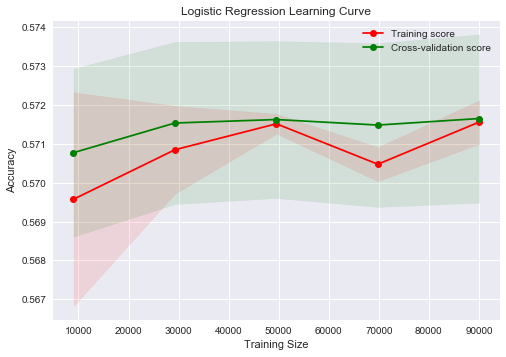

In [170]:
plot_learning_curve(LogisticRegression(multi_class='multinomial', solver='newton-cg', C=1), X_train, y_train, title='Logistic Regression Learning Curve')

In [162]:
predictions_lr = model_lr.predict(X_test)
print("Accuracy: {0:.2f}%".format(100*accuracy_score(predictions_lr, y_test)))

print("Confusion Matrix:")
print(confusion_matrix(predictions_lr, y_test))

print("Classification Report:")
print(classification_report(y_test, predictions_lr))

Accuracy: 57.08%
Confusion Matrix:
[[ 5908   990   622   347]
 [12562 25882  6317  7972]
 [ 1008   573  7051   303]
 [  555   704   287  4042]]
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.29      0.42     20033
           2       0.49      0.92      0.64     28149
           3       0.79      0.49      0.61     14277
           4       0.72      0.32      0.44     12664

    accuracy                           0.57     75123
   macro avg       0.69      0.51      0.53     75123
weighted avg       0.66      0.57      0.54     75123



In [176]:
np.argmax(model_lr.coef_, axis=1)

array([19, 20, 21, 22], dtype=int64)

In [163]:
df_test.sort_values('session_id', inplace=True)

In [164]:
predictions_lr = model_lr.predict(df_test.drop(['session_id'], axis=1))

In [66]:
len(predictions_lr)

139351

In [165]:
a_file = open("predictions10.txt", "w")
for row in predictions_lr.reshape(-1, 1):
    
    np.savetxt(a_file, row)
a_file.close()